# Sparse Matrices

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import scipy.sparse.linalg
from scipy import linalg
import pandas as pd

## 1. Sparsity

In [3]:
N = 200 
S = sparse.random(N, N, density=0.01)
density = S.nnz / N**2
print('Number of non-zeros: {}, density: {}'.format(S.nnz, density))

Number of non-zeros: 400, density: 0.01


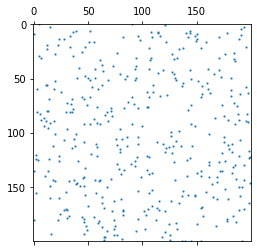

In [4]:
plt.spy(S, markersize=1);

In [5]:
print(S)

  (69, 14)	0.522427986381139
  (64, 155)	0.0941518562632454
  (19, 12)	0.7579436724130791
  (12, 109)	0.6639742265414436
  (199, 192)	0.95887619678311
  (182, 186)	0.5848122731238695
  (51, 52)	0.2748966577090478
  (180, 22)	0.23896877046271914
  (178, 31)	0.8530059065294602
  (112, 38)	0.22479416565952337
  (69, 46)	0.440875518218409
  (140, 46)	0.5596758908951989
  (112, 146)	0.828124430996492
  (77, 83)	0.8608157146376039
  (32, 129)	0.832844656352921
  (66, 181)	0.32295220557506055
  (7, 108)	0.6968319541816544
  (81, 3)	0.9118726616489478
  (123, 144)	0.7398189439829213
  (0, 90)	0.8925898715184354
  (170, 193)	0.0693916380563272
  (11, 33)	0.9375624175830997
  (112, 135)	0.42416940460929464
  (171, 189)	0.9534805793903756
  (23, 134)	0.7557566189338435
  :	:
  (170, 30)	0.2996160472545014
  (103, 126)	0.266065148584091
  (92, 145)	0.7921797308815149
  (106, 28)	0.8561424234818467
  (0, 5)	0.9109514831132172
  (41, 93)	0.26895342259482724
  (11, 116)	0.3185187877521548
  (6, 39)	0

In [6]:
type(S.A)

numpy.ndarray

In [7]:
type(S.toarray())

numpy.ndarray

In [8]:
type(S.todense())

numpy.matrix

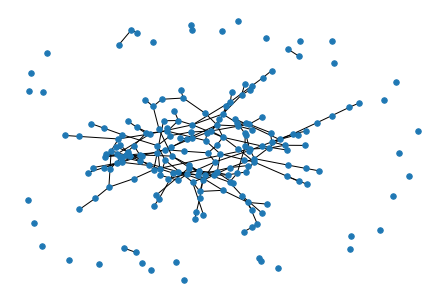

In [10]:
import networkx as nx
 
# Create a networkx graph object from sparse matrix
G = nx.from_scipy_sparse_matrix(S, parallel_edges=True, create_using=nx.MultiGraph)
 
# Draw the resulting graph
nx.draw(G, node_size=30)

## 2. Sparse matrix storage schemes

### 2.1 List of lists format (LIL)

In [11]:
# Create an empty lil matrix.
mtx = sparse.lil_matrix((4, 5))

In [12]:
# Assign some of the indices, i.e., changing the sparsity.
mtx[:2, [1, 3]] = np.array([[1, 2], [3, 4]])

In [13]:
mtx.toarray()

array([[0., 1., 0., 2., 0.],
       [0., 3., 0., 4., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [14]:
# Read some of the indices.
mtx[:2].toarray()

array([[0., 1., 0., 2., 0.],
       [0., 3., 0., 4., 0.]])

### 2.2 Coordinate format (COO)

In [15]:
row = np.array([0, 3, 1, 0])  # row coordinates
col = np.array([0, 3, 1, 2])  # column coordinates
data = np.array([4, 5, 7, 9])  # values

mtx = sparse.coo_matrix((data, (row, col)), shape=(4, 4))

In [16]:
mtx.toarray()

array([[4, 0, 9, 0],
       [0, 7, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 5]])

In [17]:
mtx_csr = mtx.tocsr()

### 2.3 Compressed sparse row & column formats (CSR & CSC)

In [18]:
# Get the data array
mtx_csr.data

array([4, 9, 7, 5], dtype=int32)

In [19]:
# Matrix-vector product from the right.
v = np.array([1, 1, 1, 1])
mtx_csr.dot(v)

array([13,  7,  0,  5], dtype=int32)

In [20]:
mtx_csc = mtx.tocsc()
# Get array of row indices for CSC
mtx_csc.indices

array([0, 1, 0, 3], dtype=int32)

In [21]:
# vectro-matrix product
v * mtx_csc

array([4, 7, 9, 5], dtype=int32)

In [22]:
# Matrix-Matrix product (* is elementwise product on Numpy!)
prod = mtx_csc * mtx_csc
prod.toarray()

array([[16,  0, 36,  0],
       [ 0, 49,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0, 25]], dtype=int32)

## 3. Linear agebra on sparse matrices

### 3. Linear agebra on sparse matrices

In [23]:
# sparse matrix from diagonals
A = sparse.spdiags(np.array([[1,2,3,4], [1,2,3,4], [1,2,3,4]]), [-1,0,2], 4, 4)
A.toarray()

array([[1, 0, 3, 0],
       [1, 2, 0, 4],
       [0, 2, 3, 0],
       [0, 0, 3, 4]])

In [24]:
A = A.tocsc()  # Convert it to CSC matrix for efficiency.
Ainv = sparse.linalg.inv(A)
Ainv.toarray()

array([[ 0.66666667,  0.33333333, -0.33333333, -0.33333333],
       [-0.16666667,  0.16666667,  0.33333333, -0.16666667],
       [ 0.11111111, -0.11111111,  0.11111111,  0.11111111],
       [-0.08333333,  0.08333333, -0.08333333,  0.16666667]])

In [25]:
sparse.linalg.norm(A)  # Default to Frobenius norm.

8.306623862918075

In [26]:
b = np.array([1, 1, 1, 1])
x = sparse.linalg.spsolve(A, b)
x

array([0.33333333, 0.16666667, 0.22222222, 0.08333333])

### 3.2 Eigenvalue decomposition

In [27]:
linalg.eigvals(A.toarray())

array([1.16822694+2.48096949j, 1.16822694-2.48096949j,
       1.57169108+0.j        , 6.09185505+0.j        ])

In [28]:
A = np.array([[1, -2j], [2j, 5]])
linalg.eigvalsh(A)

array([0.17157288, 5.82842712])

In [29]:
dummy = sparse.random(30, 30, density=0.01)
evals, evecs = sparse.linalg.eigs(dummy, k=5, which='SM')
evals

array([-8.46471738e-13+0.j,  8.46476057e-13+0.j, -5.70070128e-18+0.j,
       -2.16784355e-18+0.j,  3.34315077e-18+0.j])